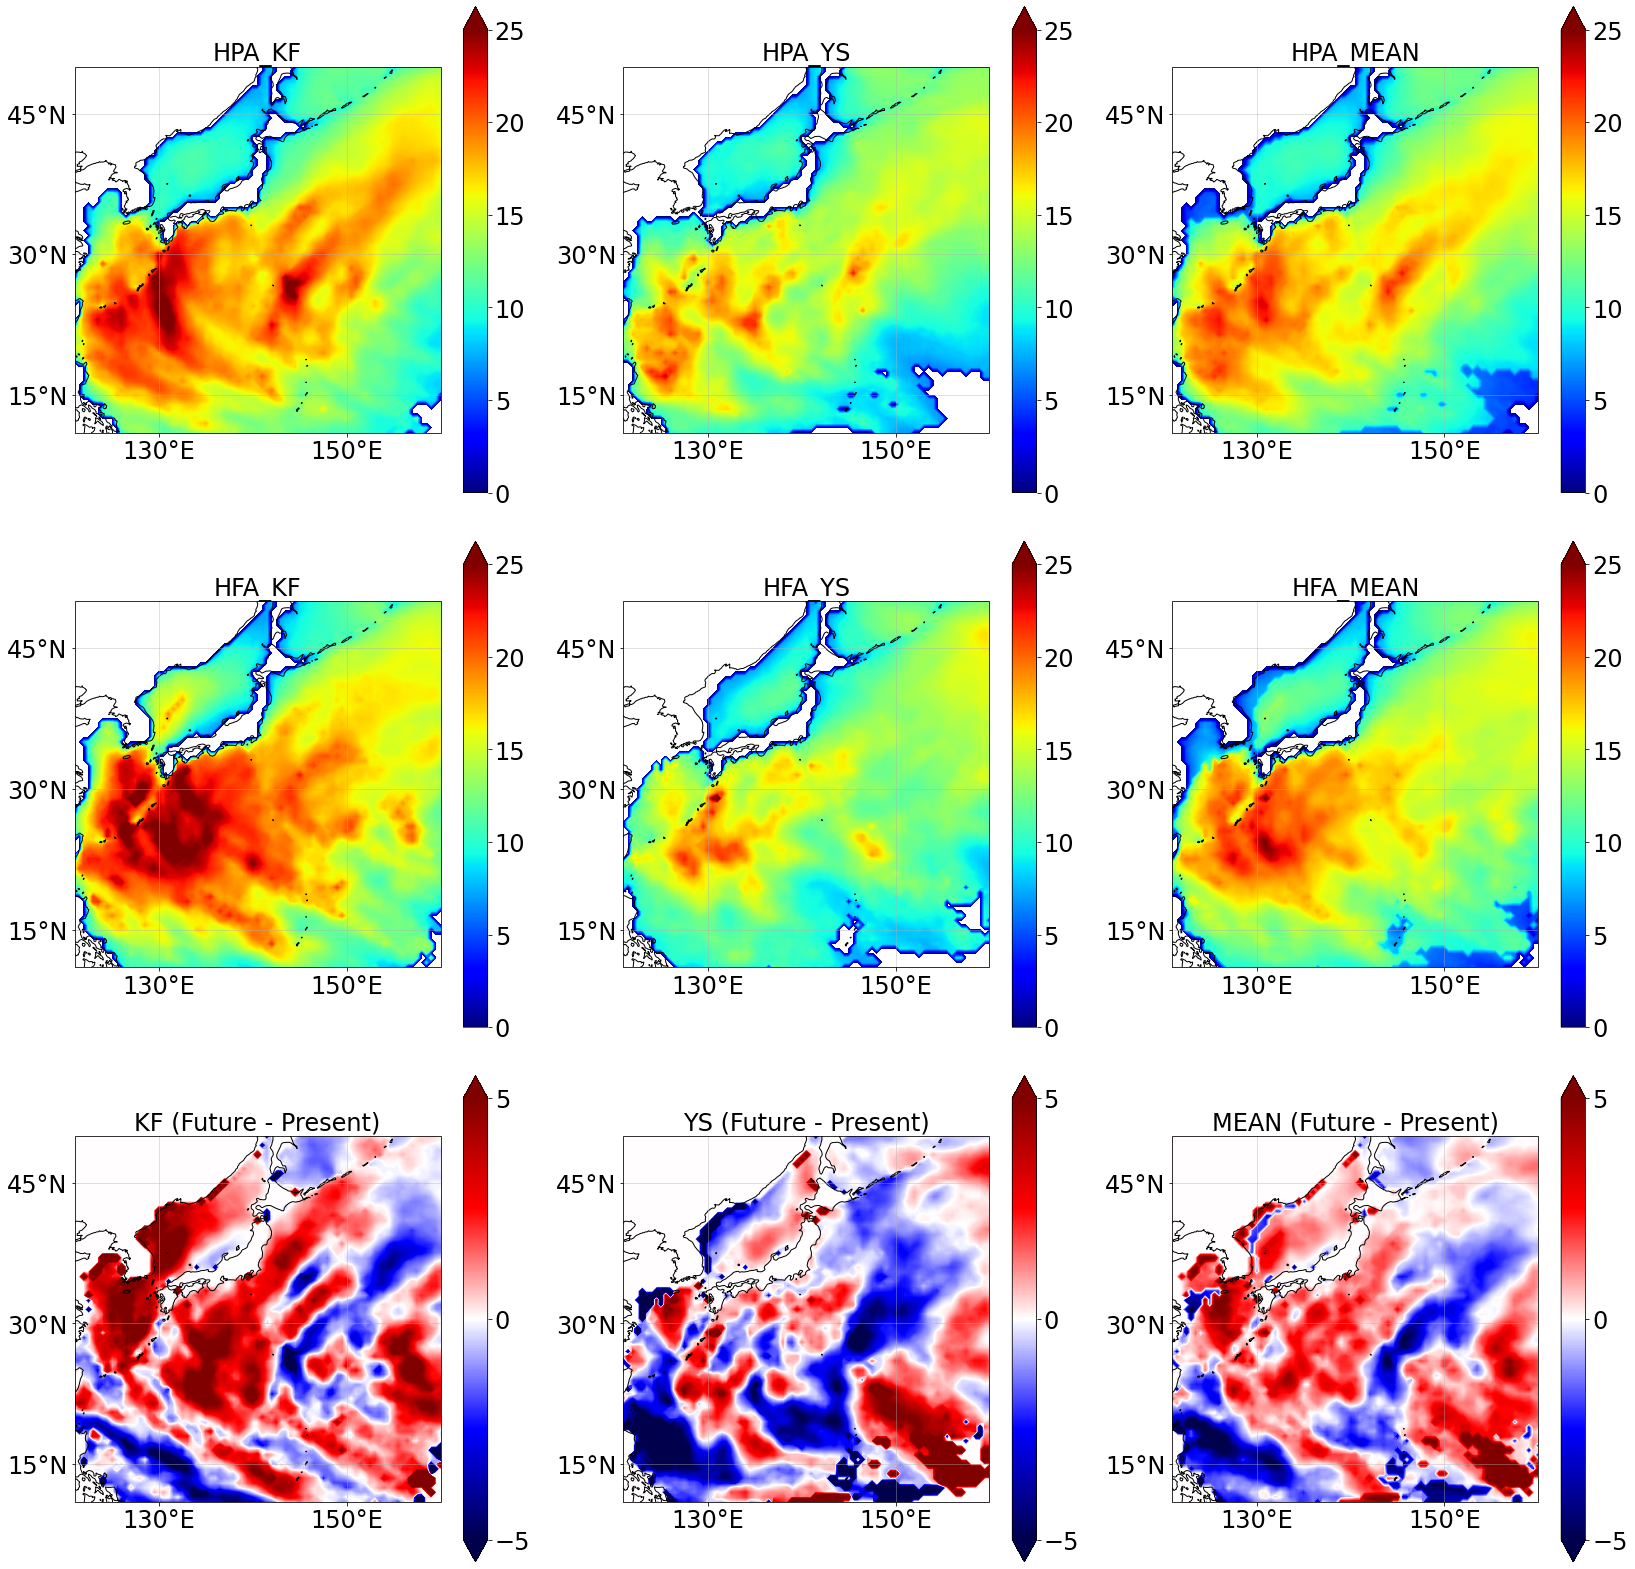

In [2]:
"""
model間の現在・将来の10年再現期待値を比較する
"""

from csv import reader
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import copy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as ticker

MODEL = ['KF', 'YS', 'MEAN']

with open('../lats.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lats = list(csv_reader)
with open('../lons.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lons = list(csv_reader)

# 緯度経度をstrからfloatに変換
for i in range(79):
    for j in range(79):
        lats[i][j] = float(lats[i][j])
        lons[i][j] = float(lons[i][j])

DATA_F = []
DATA_P = []

# ASは解析対象外
# with open('RV_csv/HFA_AS.csv', 'r') as csv_file:
#     csv_reader = reader(csv_file)
#     DATA_F.append(list(csv_reader))
# with open('RV_csv/HPA_AS.csv', 'r') as csv_file:
#     csv_reader = reader(csv_file)
#     DATA_P.append(list(csv_reader))
with open('RV_csv/HFA_KF.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_F.append(list(csv_reader))
with open('RV_csv/HPA_KF.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_P.append(list(csv_reader))
with open('RV_csv/HFA_YS.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_F.append(list(csv_reader))
with open('RV_csv/HPA_YS.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_P.append(list(csv_reader))

# str → float
for i in range(79):
    for j in range(79):
        for k in range(2):
            if float(DATA_F[k][i][j]) > 0:
                DATA_F[k][i][j] = float(DATA_F[k][i][j])
            else:
                DATA_F[k][i][j] = -0.01
            if float(DATA_P[k][i][j]) > 0:
                DATA_P[k][i][j] = float(DATA_P[k][i][j])
            else:
                DATA_P[k][i][j] = -0.01

# list → np-array
for i in range(2):
    DATA_F[i] = np.array(DATA_F[i])
    DATA_P[i] = np.array(DATA_P[i])

DATA_F.append((DATA_F[0] + DATA_F[1]) / 2)
DATA_P.append((DATA_P[0] + DATA_P[1]) / 2)

# 現在気候・将来気候のRV contour
fig = plt.figure(figsize=(24, 24))
levels = np.arange(0, 25.01, 0.01)
cmap = copy.copy(mpl.cm.get_cmap("jet"))
for i in range(2):  # P or F
    for j in range(3):  # model
        ax = fig.add_subplot(3, 3, 3 * i + j + 1, projection=ccrs.PlateCarree())
        if i == 0:
            a = plt.contourf(lons, lats, DATA_P[j], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='max')
        else:
            a = plt.contourf(lons, lats, DATA_F[j], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='max')
        c_bar = plt.colorbar(a, ticks=[0, 5, 10, 15, 20, 25])
        ## ここからテンプレ
        c_bar.ax.tick_params(labelsize=24)
        c_bar.ax.yaxis.set_minor_locator(ticker.NullLocator())
        ax.set_xticks([130,150], crs=ccrs.PlateCarree()) # gridを引く経度を指定 360にすると0Wが出ない
        ax.set_yticks([15, 30, 45], crs=ccrs.PlateCarree()) # gridを引く緯度を指定
        lon_formatter = LongitudeFormatter(zero_direction_label=True) # 経度
        lat_formatter = LatitudeFormatter() # 緯度。formatを指定することも可能
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.axes.tick_params(labelsize=24)
        ax.grid()
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, alpha=0.5) # 経度線・緯度線ラベルを無効
        gl.xlocator = ticker.FixedLocator([130, 150]) # 経度線
        gl.ylocator = ticker.FixedLocator([15, 30, 45]) # 緯度線
        ax.coastlines()
        ## ここまでテンプレ
        if i == 0:
            ax.set_title('HPA_' + MODEL[j], fontsize=24)
        else:
            ax.set_title('HFA_' + MODEL[j], fontsize=24)
# 描画(差)
levels = np.arange(-5, 5.01, 0.01)
cmap = copy.copy(mpl.cm.get_cmap("seismic"))
for i in range(3):
    ax = fig.add_subplot(3, 3, i + 7, projection=ccrs.PlateCarree())
    a = plt.contourf(lons, lats, DATA_F[i] - DATA_P[i], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='both')
    c_bar = plt.colorbar(a, ticks=[-5, 0, 5])
    ## ここからテンプレ
    c_bar.ax.tick_params(labelsize=24)
    c_bar.ax.yaxis.set_minor_locator(ticker.NullLocator())
    ax.set_xticks([130,150], crs=ccrs.PlateCarree()) # gridを引く経度を指定 360にすると0Wが出ない
    ax.set_yticks([15, 30, 45], crs=ccrs.PlateCarree()) # gridを引く緯度を指定
    lon_formatter = LongitudeFormatter(zero_direction_label=True) # 経度
    lat_formatter = LatitudeFormatter() # 緯度。formatを指定することも可能
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.axes.tick_params(labelsize=24)
    ax.grid()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, alpha=0.5) # 経度線・緯度線ラベルを無効
    gl.xlocator = ticker.FixedLocator([130, 150]) # 経度線
    gl.ylocator = ticker.FixedLocator([15, 30, 45]) # 緯度線
    ax.coastlines()
    ## ここまでテンプレ
    ax.set_title(MODEL[i] + ' (Future - Present)', fontsize=24)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.1)
plt.savefig("../img/10y_rv.png")
plt.show()